# TP N° 2 - INTERPOLATION POLYNOMIALE ET BASE DE LAGRANGE

**Auteurs:** Cyprien BOSCHER & Ilyas GHANDAOUI  
**Filière:** FI I1  
**Date:** 22/09/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Que vaut Lₖ(x) ?

Le polynôme de base de Lagrange Lₖ(x) est défini par :

$$L_k(x) = \prod_{i=0, i \neq k}^{n} \frac{x - x_i}{x_k - x_i}$$

In [2]:
def lagrange_basis(x_points, k):
    """
    Calcule le k-ième polynôme de base de Lagrange L_k(x)
    """
    def L_k(x):
        result = 1.0
        for i in range(len(x_points)):
            if i != k:
                result *= (x - x_points[i]) / (x_points[k] - x_points[i])
        return result
    return L_k

## 2. Après avoir traduit yᵢ = P(xᵢ), pour i allant de 0 à n, expliquer pourquoi aₖ = yₖ

Si P(x) = a₀L₀(x) + a₁L₁(x) + ... + aₙLₙ(x), alors :

P(xₖ) = a₀L₀(xₖ) + a₁L₁(xₖ) + ... + aₖLₖ(xₖ) + ... + aₙLₙ(xₖ)

Comme Lᵢ(xₖ) = 0 pour i ≠ k et Lₖ(xₖ) = 1, on obtient :

P(xₖ) = aₖ × 1 = aₖ

Or, par définition de l'interpolation : P(xₖ) = yₖ

Donc : **aₖ = yₖ**

In [3]:
def interpolation_lagrange(x_points, y_points):
    """
    Interpolation par la base de Lagrange
    """
    def P(x):
        result = 0.0
        for i in range(len(x_points)):
            L_i = lagrange_basis(x_points, i)
            result += y_points[i] * L_i(x)
        return result
    return P

## 3. Tracer sur un même graphique une fonction f (f = sin puis f : x ↦ 1/(1+10x²)) ainsi que son polynôme d'interpolation associé

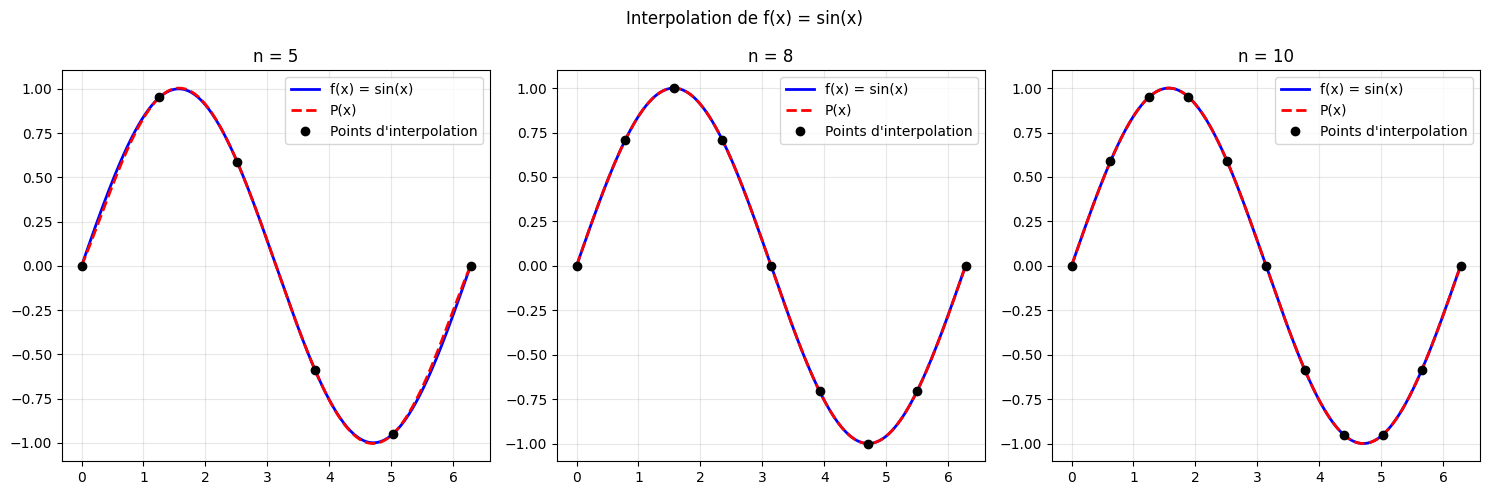

In [4]:
# Test avec f = sin sur [0, 2π], n = 3, 4, 5
a, b = 0, 2*np.pi
f = np.sin

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, n in enumerate([5, 8, 10]):
    # Points d'interpolation
    x_points = np.linspace(a, b, n + 1)
    y_points = f(x_points)
    
    # Polynôme d'interpolation
    P = interpolation_lagrange(x_points, y_points)
    
    # Points pour tracer
    x_plot = np.linspace(a, b, 500)
    y_original = f(x_plot)
    y_interpolated = np.array([P(x) for x in x_plot])
    
    # Graphique
    axes[idx].plot(x_plot, y_original, 'b-', label='f(x) = sin(x)', linewidth=2)
    axes[idx].plot(x_plot, y_interpolated, 'r--', label='P(x)', linewidth=2)
    axes[idx].plot(x_points, y_points, 'ko', markersize=6, label='Points d\'interpolation')
    axes[idx].set_title(f'n = {n}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Interpolation de f(x) = sin(x)')
plt.tight_layout()
plt.show()

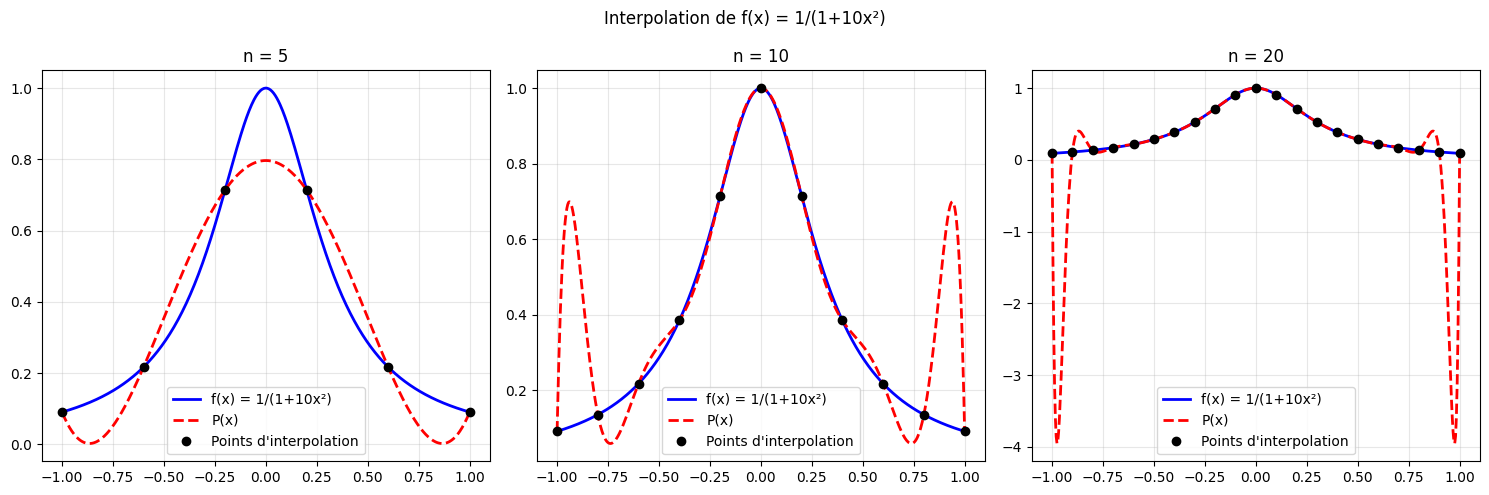

In [8]:
# Test avec f : x -> 1/(1+10x²) sur [-1, 1], n = 3, 4, 5
a, b = -1, 1
def f_runge(x):
    return 1 / (1 + 10 * x**2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, n in enumerate([5, 10, 20]):
    # Points d'interpolation
    x_points = np.linspace(a, b, n + 1)
    y_points = f_runge(x_points)
    
    # Polynôme d'interpolation
    P = interpolation_lagrange(x_points, y_points)
    
    # Points pour tracer
    x_plot = np.linspace(a, b, 500)
    y_original = f_runge(x_plot)
    y_interpolated = np.array([P(x) for x in x_plot])
    
    # Graphique
    axes[idx].plot(x_plot, y_original, 'b-', label='f(x) = 1/(1+10x²)', linewidth=2)
    axes[idx].plot(x_plot, y_interpolated, 'r--', label='P(x)', linewidth=2)
    axes[idx].plot(x_points, y_points, 'ko', markersize=6, label='Points d\'interpolation')
    axes[idx].set_title(f'n = {n}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Interpolation de f(x) = 1/(1+10x²)')
plt.tight_layout()
plt.show()